# K plus proches voisins avec sickit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

On importe les objets des bibliothèques nécessaires

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [3]:
frame_nba=pd.read_csv("nba_2013.csv")
frame_nba.dropna(inplace=True)

In [4]:
#on crée le modèle
modele_knn=KNeighborsRegressor(n_neighbors=10)

In [5]:
frame_nba[frame_nba["player"]=="Tony Parker"]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
344,Tony Parker,PG,31,SAS,68,68,1997,456,914,0.499,...,138,155,388,36,9,151,86,1134,2013-2014,2013


In [6]:
frame_nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [7]:
#récupérer les var quanti
x_nba=frame_nba[[var for var in frame_nba.columns if frame_nba[var].dtypes!=object]]
x_nba=x_nba.drop("pts",axis=1)

In [8]:
y_nba=frame_nba["pts"]

In [9]:
# découpage des données en apprentissage / test
x_train, x_test,y_train,y_test=train_test_split(x_nba,y_nba,test_size=0.20)

In [10]:
modele_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [11]:
y_test_pred=modele_knn.predict(x_test)

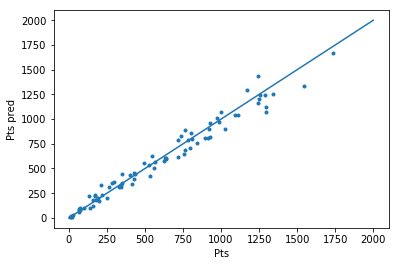

In [12]:
plt.scatter(y_test,y_test_pred,marker=".")
plt.plot(np.linspace(0,2000,10),np.linspace(0,2000,10))
plt.xlabel("Pts")
plt.ylabel("Pts pred")

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
mean_squared_error(y_test,y_test_pred)

5417.6508641975315

In [15]:
((y_test-y_test_pred)**2).mean()

5417.6508641975315